In [1]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

colors = {
    'main': '#CFD923',
    'second': '#EB5D18',
    'extra': '#E0E0E0'
}

def inter_from_256(x):
    return np.interp(x=x,xp=[0,255],fp=[0,1])

cdict = {
    'red': (
            (0, inter_from_256(224), inter_from_256(224)),
            (0.5, inter_from_256(207), inter_from_256(207)),
            (1, inter_from_256(235), inter_from_256(235)),
    ),
    'green': (
        (0, inter_from_256(224), inter_from_256(224)),
        (0.5, inter_from_256(217), inter_from_256(217)),
        (1, inter_from_256(93), inter_from_256(93)),
    ),
    'blue': (
        (0, inter_from_256(224), inter_from_256(224)),
        (0.5, inter_from_256(35), inter_from_256(35)),
        (1, inter_from_256(24), inter_from_256(24)),
        
    ),
           
}

brunoyam_cmap = LinearSegmentedColormap('brunoyam_cmap', segmentdata=cdict)

plt.rcParams.update({'font.family':'Closer'})
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

In [3]:
np.random.seed(0)
centers = np.array([[0, 0, 0], [5, 5, 5], [-5, -5, -5]])

data = np.array([[], [], []]).T
for x, y, z in centers:
    x_p = np.random.normal(x, size=10)
    y_p = np.random.normal(y, size=10)
    z_p = np.random.normal(z, size=10)
    new_row = np.array([x_p, y_p, z_p]).T
    data = np.vstack([data, new_row])

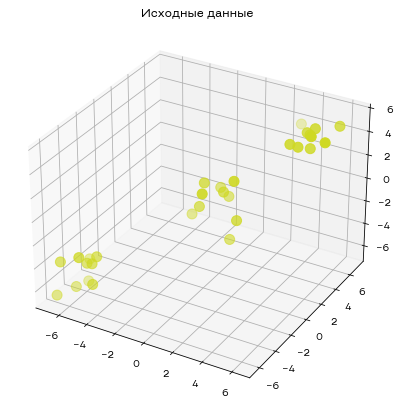

In [4]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors['main'], s=100)
plt.title('Исходные данные')

plt.savefig('../images/pca_data.jpg')

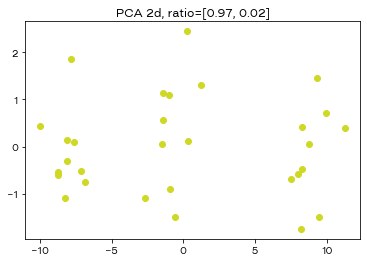

In [5]:
pca_2d = PCA(2)
pca_data = pca_2d.fit_transform(data)

plt.title(f'PCA 2d, ratio=[{pca_2d.explained_variance_ratio_[0]:.2f}, {pca_2d.explained_variance_ratio_[1]:.2f}]',)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=colors['main'])

plt.savefig('../images/pca_2d.jpg')

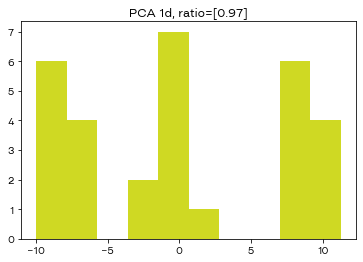

In [6]:
pca_1d = PCA(1)
pca_data = pca_1d.fit_transform(data)

plt.title(f'PCA 1d, ratio=[{pca_1d.explained_variance_ratio_[0]:.2f}]',)
plt.hist(pca_data, color=colors['main'])

plt.savefig('../images/pca_1d.jpg')

In [7]:
pca = PCA(0.96)
print(pca.fit_transform(data).shape) # (30, 1)

pca = PCA(0.98)
print(pca.fit_transform(data).shape) # (30, 2)

pca = PCA(0.99)
print(pca.fit_transform(data).shape) # (30, 3)

(30, 1)
(30, 2)
(30, 3)
